<a href="https://colab.research.google.com/github/Aranzasuu/ADA-Informes/blob/main/Cutting_a_Rod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROGRAMACIÓN DINÁMICA**

La programación dinámica es un método para reducir el tiempo de ejecución de un algoritmo mediante la utilización de subestructura óptima (usar soluciones óptimas de subproblemas para encontrar la solución óptima del problema en su conjunto). Los pasos generales para problemas de éste tipo son:

- Caracterización la estructura de una solución óptima.

- Definición del valor óptimo de manera recursiva.

- Cálculo del valor de la solución óptima.

- Contruir la solución óptima a partir de la información calculada.

# **1. PROBLEMA DE OPTIMIZACIÓN**

## **1.1 Descripción del problema**
### **↪ Corte de varillas:**
Una  empresa compró barras de acero largas y las cortó en barras de acero forjado para la venta. El proceso de corte en sí no tiene costo. La gerencia de la compañía quiere conocer el mejor plan de corte.

Supongamos que sabemos que Serling vende una barra de acero con una longitud de $i$ pulgadas a un precio de $p_i$. La longitud de las barras de acero son todas pulgadas. La siguiente tabla muestra una lista de precios de muestra:

> ![image](https://i.imgur.com/OnnxZFy.jpg)

## **1.2 Análisis del problema**

El problema de corte de varillas consiste en dada una longitud $n$ pulgadas y una lista de precios $p = [p_1, p_2,...,p_n]$, debemos encontrar el mejor corte para maximizar los ingresos por venta. Algo a considerar es también que la solución más óptima sea no cortar la barra.

Considere el caso de $n = 4$. La siguiebte figura muestra todas las opciones de corte posibles para barras de acero de 4 pulgadas, incluidas las que no cortan en absoluto. Donde si observamos la solución más óptima corresponde partir la barra a la mitad donde da una ganancia de 10.

> ![image](https://www.programmerclick.com/images/564/b4e504163cb70924ef094e37184ca85c.png)

---

## DATOS:

**↪ 𝙴𝚗𝚝𝚛𝚊𝚍𝚊:** Una varilla de largo $n$ y un vector de precios de cada medida $p = [1...n]$

**↪ 𝚂𝚊𝚕𝚒𝚍𝚊:** Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.

# **2. EXPLICACIÓN ALGORITMO**

Para resolver este problema, podemos implementar el algoritmo de varias formas:

1. Recursividad
2. Programación dinámica → Bottom-Up
3. Programación dinámica → Top-Down

Pero en este informe, sólo se implementará la forma recursiva y la técnica Bottom-Up.

Técnica $bottom-up$: Consiste en que las partes individuales se diseñan con detalle y luego se enlazan hasta que se forma el sistema completo. Las estrategias basadas en esta técnica se basan en el conocimiento de todas las variables que pueden afectar los elementos del sistema.


In [24]:
# Importación de las librerías
import matplotlib.pyplot as plt
import math
import datetime
import seaborn as sns
from timeit import repeat
import numpy as np
import random
from termcolor import colored

In [ ]:
# GENERAR INSTANCIAS

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

cutrod_instance_generator(10)

## **2.1 SOLUCIÓN RECURSIVA**

El método de solución recursiva simple,corta la barra de acero de la izquierda a una sección de longitud $i$, luego continúa cortando la sección restante de longitud $n-i$ a la derecha, sin cortar la sección izquierda. La forma de descomponer el problema es descomponer la barra de acero de longitud $n$ en el segmento inicial a la izquierda, y el resultado de la descomposición continua de la parte restante. El esquema sin ningún corte puede describirse como: la longitud del primer segmento es n, y el retorno es $p_n$, La longitud de la parte restante es $0$, el ingreso correspondiente $r_0 = 0$. Para que pueda obtener la siguiente fórmula:

> $r_n = max(p_i + r_n-i)$

### **2.1.1 CÓDIGO RECURSIVO**

In [48]:
recursion = 0

def cutRodRec(p, n, verbose):
  global recursion
  maximo = 0
  if n == 0: return 0, maximo

  q = float("-inf")

  for i in range(1,n):
    aux, _ = cutRodRec(p, n-i-1,verbose)
    recursion += 1
    temp = max(q, p[i] + aux)
    if temp > q:
      q = temp
      maximo = i
  return q, maximo

precios = cutrod_instance_generator(10)
n = len(precios)

optimo, corte = cutRodRec(precios, n, verbose = False)
print("Para el vector de precios total >>", precios)
print("Largo >>",n)
print("El coste máximo >>", optimo)
print(f"Cortes cantidad >> {corte} >> ({len(precios[:corte+1])} , {len(precios[corte+1:n])})")
print("Cantidad de recursiones >>", recursion)



Para el vector de precios total >> [10, 16, 23, 30, 35, 43, 50, 50, 60, 60]
Largo >> 10
El coste máximo >> 80
Cortes cantidad >> 1 >> (2 , 8)
Cantidad de recursiones >> 88


### **2.1.2 VERBOSE = TRUE (RECURSIVIDAD)**

In [46]:
precios = cutrod_instance_generator(10)
n = len(precios)

optimo, corte = cutRodRec(precios, n, verbose = True)
print("Para el vector de precios total >>", precios)
print("Largo >>",n)
print("El coste máximo >>", optimo)

Para el vector de precios total >> [7, 15, 25, 34, 39, 45, 48, 56, 58, 58]
Largo >> 10
El coste máximo >> 84


## **2.2 SOLUCIÓN BOTTOM-UP**

La implementación del bottom-up utiliza un arreglo inicializado en 0, en el que se almacenarán los máximos beneficios posibles de la varilla. Donde calculará a través de un ciclo el máximo beneficio de cada corte y lo irá guardando en el arreglo antes mencionado.



### **2.2.1 CÓDIGO BOTTOM UP**

In [50]:
comparison = 0

def rodCutBotUp(price, n,verbose = False):

    global comparison
    if n == 0: return 0
 
    r = [None] * (n + 1)
    c = [0] * (n + 1) # cortes
    r[0] = 0

    for j in range(1, n + 1):
        comparison += 1
        if verbose:
          print(colored(f"> Subproblema {str(j)}", "cyan"))
        r[j] = 0
        aux = float("-inf")
        for i in range(j):
            if verbose:
              print(colored(f"   >> i = {str(i)}", "green"))
              print(f"   aux = {aux}")
              print(f"   largo para la siguiente iteración = {n-i-1}")
            tmp = price[i] + r[j-i-1]
            if verbose:
              print(f"   tmp = {tmp} => p[{i}] + r[{j-i-1}] = {price[i]} + {r[j-i-1]} = {price[i] + r[j-i-1]}\n")
            if aux < tmp:
              aux = tmp
              c[j] = i + 1
              
        r[j] = aux
        if verbose:
          print(colored(f"> r = {str(r)}", "red"))
          print("-----------------------------------\n")
 
    return r[n], c[n]

price = cutrod_instance_generator(10)
n = len(price)
maximo, corte = rodCutBotUp(price, n, verbose = False)
print("Para el vector de precios total >>", price)
print("Largo >>",n)
print('Valor máximo >>', maximo)
print("corte(s) >>", corte)
print("cantidad comparaciones >>", comparison)

Para el vector de precios total >> [0, 1, 6, 9, 16, 24, 34, 35, 35, 38]
Largo >> 10
Valor máximo >> 40
corte(s) >> 3
cantidad comparaciones >> 10


### **2.2.2 VERBOSE = TRUE (BOTTOM UP)**



In [21]:
price = cutrod_instance_generator(10)
n = len(price)
print("DATOS: \n-----------------------------------\n")
print("ARREGLO DE PRECIOS >>", price)
print("PARA UN LARGO >>",n)
print("\nPROCESO: \n-----------------------------------\n")
maximo, corte = rodCutBotUp(price, n, verbose = True)
print('VALOR MÁXIMO >>', maximo)

DATOS: 
-----------------------------------

ARREGLO DE PRECIOS >> [4, 4, 12, 15, 24, 25, 26, 27, 36, 44]
PARA UN LARGO >> 10

PROCESO: 
-----------------------------------

> Subproblema 1
   >> i = 0
   aux = -inf
   largo para la siguiente iteración = 9
   tmp = 4 => p[0] + r[0] = 4 + 0 = 4

> r = [0, 4, None, None, None, None, None, None, None, None, None]
-----------------------------------

> Subproblema 2
   >> i = 0
   aux = -inf
   largo para la siguiente iteración = 9
   tmp = 8 => p[0] + r[1] = 4 + 4 = 8

   >> i = 1
   aux = 8
   largo para la siguiente iteración = 8
   tmp = 4 => p[1] + r[0] = 4 + 0 = 4

> r = [0, 4, 8, None, None, None, None, None, None, None, None]
-----------------------------------

> Subproblema 3
   >> i = 0
   aux = -inf
   largo para la siguiente iteración = 9
   tmp = 12 => p[0] + r[2] = 4 + 8 = 12

   >> i = 1
   aux = 12
   largo para la siguiente iteración = 8
   tmp = 8 => p[1] + r[1] = 4 + 4 = 8

   >> i = 2
   aux = 12
   largo para la sigui

### **2.2.3 EJEMPLO BOTTOM-UP**

Para entender de mejor manera el funcionamiento de este algoritmo veremos un ejemplo paso a paso, siguiendo la estructura de este.

**↪ 𝙴𝚗𝚝𝚛𝚊𝚍𝚊:** $[1,5,8,9,10,17,17,20]$ y largo $n = 4$.

1. Creamos el arreglo $r$ que guardará las máximas soluciones de cada corte, este será incializado con $None$ y la primera posición será 0:

> $r = [None] * (n+1)$
> $r[0] = 0$
> $r = [0, vacio, vacio, vacio, vacio]$

- Una variable a considerar es nuestro $aux$ que nos ayudará a comparar con las demás soluciones de los subproblemas ya resueltos.

> $aux = p[i-1] + r[j-i]$

2. Ahora ingresaremos al ciclo $for$ donde iniciaremos en la posición $j = 1$ y comenzaremos iterando:

> $i = 0$ → $p[0] + r[1-1] = 1 + 0 ⇒ 1 > aux (-∞) ⇒ aux = 1$
>
> $r[j] = aux ⇒ r[1] = 1$
>
> $r = [0, 1, vacio, vacio, vacio]$

3. Seguimos iterando, ahora con $j = 2$:

> $i = 0$ → $p[0]+r[2-1] = 1 + 1 ⇒ 2 > aux (-∞) ⇒ aux = 2$
>
> $i = 1$ → $p[1]+r[2-2] = 5 + 0 ⇒ 5 > aux (2) ⇒ aux = 5$
>
> $r[j] = aux ⇒ r[2] = 5$
>
> $r = [0, 1, 5, vacio, vacio]$

4. Continuamos con $j = 3$:

> $i = 0$ → $p[0] + r[3-1] = 1 + 5 ⇒ 6 > aux (-∞) ⇒ aux = 6$
>
> $i = 1$ → $p[1] + r[3-2] = 5 + 1 ⇒ 6 = aux (6) ⇒ aux = 6$
> 
> $i = 2$ → $p[2] + r[3-3] = 8 + 0 ⇒ 8 > aux ⇒ aux = 8$
>
> $r[j] = aux ⇒ r[3] = 8$
>
> $r = [0, 1, 5, 8, vacio]$

5. Finalmente, realizamos la última iteración con $j = 4$:

> $i = 0$ → $p[0] + r[4-1] = 1 + 8 ⇒ 9 > aux (-∞) ⇒ aux = 9$
>
> $i = 1$ → $p[1] + r[4-2] = 5 + 5 ⇒ 10 > aux (9) ⇒ aux = 10$
>
> $i = 2$ → $p[2] + r[4-3] = 8 + 1 ⇒ 9 < aux (10) ⇒ aux = 10$
>
> $i = 3$ → $p[3] + r[4-4] = 9 + 0 ⇒ 9 < aux (10) ⇒ aux = 10$
>
> $r[j] = aux ⇒ r[4] = 10$
>
> $r = [0, 1, 5, 8, 10]$

Así obteniendo que el valor máximo para una varilla de largo 4 es 10.


# **3. CORRECTITUD**

**↪ Hipótesis:** El algoritmo con técnica Bottom Up tiene como salida el valor que al cortar una varilla de largo $n$ que maximize el precio. Aunque esta no sea recursiva, se demostrará con **inducción matemática**:

**↪ Caso Base:** Cuando $n = 0$, el algoritmo retorna 0, ya que se asume que ese valor es el máximo ya que siempre será el mismo, por lo que $P(0)$ se cumple.

**↪ Caso Inductivo:** Como ya comprobamos que nuestro caso base se cumple, debemos comprobar para lo demás casos donde $m < n$ y se utilizan las soluciones anteriores. Por lo que en cada iteración nos aseguramos que se almacenará siempre el máximo valor en el arreglo.

Ya que para cada subproblema $j$ se revisará desde $i$ hasta $j$ el valor máximo, donde si $aux < tmp$, $aux = price[i] + r[j-i-1]$ en caso contrario conserva su valor. Así calculando el retorno máximo para $r[j]$

Cuando llegue al final de la iteración es decir $j = n$ se habrá calculado todos los cortes posibles y almacenado el máximo de cada uno, por lo que podemos concluir que el **algoritmo es correcto**.

# **4. TIEMPO DE EJECUCIÓN**

## **Teorema: correctitud de Cut Rod con la técnica bottom-up**

Este algoritmo se implementa a través de la programación dinámica, donde recibe un vector de precios $p = [p_1, p_2,...,p_n]$ y el largo de la varilla $n$. Donde retorna el máximo valor para obtener la mayor ganancia comparando todas las posibilidades de cortes existentes. Donde debemos comprobar que la complejidad de este algoritmo corresponde a $O(n^2)$.

## **Comprobación**

> $T(n) = ∑ (j = 1 → n) + ∑ (i = 1 → j)$ 

- La primera sumatoria corresponde al primer for que va desde 1 hasta n.

- La segunda sumatoria corresponde al segundo for que se encuentra en el algoritmo y va desde 1 hasta j

Por lo tanto, desarrollando, la primera sumatoria quedaria con complejidad $O(n)$ ya que recorre el arreglo completo y la segunda sumatoria quedaría por propiedad $n(n-1)/2$.

> $T(n) = O(n) + n^2-n/2$

Aplicando la notación O-grande a toda la fórmula nos quedaría

> $T(n) = O(n) + O(n^2) ⇒ O(n^2)$

Así concluyendo que el teorema propuesto al comienzo es correcto.





# **EXPERIMENTOS**

## **1. Tiempo de Ejecución**

Este gráfico demuestra el tiempo de ejecución entre el algoritmo recursivo v/s la técnica **bottom up** para un arreglo $p$ de largo $n$ (cantidad de $n$ precios).

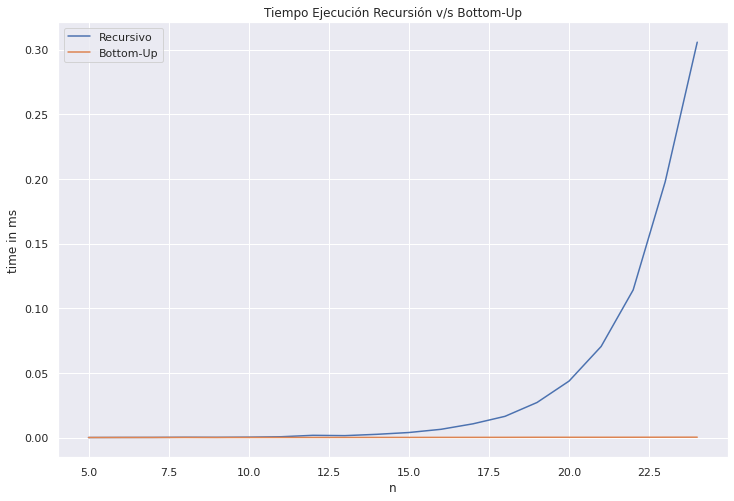

In [33]:
w=[]; r=[]; y=[]

#sns.set(rc={'figure.figsize':(12,8)})

for j in range(5,25):

  p = cutrod_instance_generator(j)
  n = len(p)

  l = repeat(setup="from __main__ import cutRodRec", stmt=f"cutRodRec({p},{n},{False})", repeat=1, number=5)
  u = repeat(setup="from __main__ import rodCutBotUp", stmt=f"rodCutBotUp({p},{n},{False})", repeat=1, number=5)

  w.append(j)
  r.append(l)
  y.append(u)


plt.plot(w,r)
plt.plot(w,y)
plt.legend(["Recursivo","Bottom-Up"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title('Tiempo Ejecución Recursión v/s Bottom-Up')
plt.show()

> Como podemos observar en el gráfico, mientras la cantidad de problemas a resolver vaya aumentando, al utilizar el método recursivo su tiempo de ejecución aumenta considerablemente, mientras que al utilizar el método Bottom-Up podemos observar que es lineal, ya que al guardar los resultados de los subproblemas ya resueltos, sólo calcula una vez y ahorra mucho más tiempo.